In [132]:
# House Rent Prediction - Simple AI Model Tutorial
# Perfect for teaching AI fundamentals: Linear Regression, Loss Function, Gradient Descent

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🏠 House Rent Prediction - AI Model Tutorial")
print("="*50)


🏠 House Rent Prediction - AI Model Tutorial


In [133]:

# ============================================================================
# PART 1: Understanding the Problem and Data
# ============================================================================

print("\n📚 PART 1: Our Training Data")
print("-" * 30)

# Create training dataset
training_data = np.array([
    [1200, 3, 2, 8, 2300],  # [sqft, bedrooms, bathrooms, school_rating, actual_rent]
    [800, 2, 1, 6, 1600],
    [1500, 4, 3, 9, 2800],
    [1000, 2, 2, 7, 1900],
    [1800, 4, 3, 9, 3200],
    [900, 2, 1, 5, 1400],
    [1300, 3, 2, 8, 2400],
    [2000, 5, 4, 10, 3800]
])

# Create DataFrame for better visualization
df = pd.DataFrame(training_data, 
                 columns=['Square_Feet', 'Bedrooms', 'Bathrooms', 'School_Rating', 'Actual_Rent'])

print("Our training data (known examples with correct answers):")
display(df)



📚 PART 1: Our Training Data
------------------------------
Our training data (known examples with correct answers):


,Square_Feet,Bedrooms,Bathrooms,School_Rating,Actual_Rent
0,1200,3,2,8,2300
1,800,2,1,6,1600
2,1500,4,3,9,2800
3,1000,2,2,7,1900
4,1800,4,3,9,3200
5,900,2,1,5,1400
6,1300,3,2,8,2400
7,2000,5,4,10,3800


/var/folders/85/11b90tsx3tg4vc_sdxhsvr700000gn/T/ipykernel_74927/2449179655.py:25: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
/Users/ajaynara/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


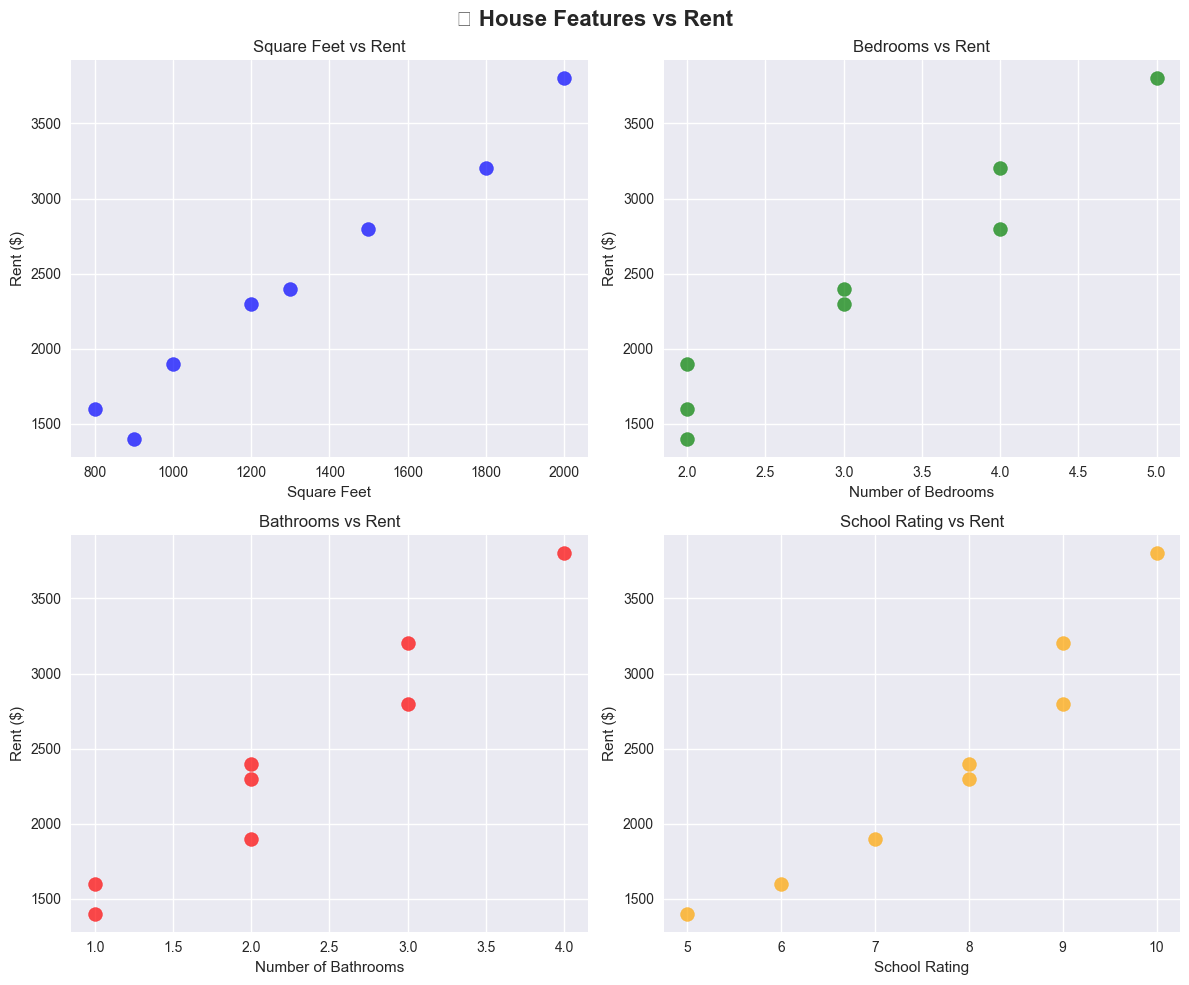

In [124]:

# Visualize the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('🏠 House Features vs Rent', fontsize=16, fontweight='bold')

axes[0,0].scatter(df['Square_Feet'], df['Actual_Rent'], color='blue', s=100, alpha=0.7)
axes[0,0].set_xlabel('Square Feet')
axes[0,0].set_ylabel('Rent ($)')
axes[0,0].set_title('Square Feet vs Rent')

axes[0,1].scatter(df['Bedrooms'], df['Actual_Rent'], color='green', s=100, alpha=0.7)
axes[0,1].set_xlabel('Number of Bedrooms')
axes[0,1].set_ylabel('Rent ($)')
axes[0,1].set_title('Bedrooms vs Rent')

axes[1,0].scatter(df['Bathrooms'], df['Actual_Rent'], color='red', s=100, alpha=0.7)
axes[1,0].set_xlabel('Number of Bathrooms')
axes[1,0].set_ylabel('Rent ($)')
axes[1,0].set_title('Bathrooms vs Rent')

axes[1,1].scatter(df['School_Rating'], df['Actual_Rent'], color='orange', s=100, alpha=0.7)
axes[1,1].set_xlabel('School Rating')
axes[1,1].set_ylabel('Rent ($)')
axes[1,1].set_title('School Rating vs Rent')

plt.tight_layout()
plt.show()

In [125]:

# ============================================================================
# PART 2: The AI Model - Linear Equation
# ============================================================================

print("\n🤖 PART 2: Our AI Model")
print("-" * 30)

class SimpleRentPredictor:
    def __init__(self):
        """
        Initialize our AI model with starting parameters
        These are the numbers the model will learn to adjust
        """
        # Weights (parameters) - how much each feature influences rent
        self.w1 = 0.5    # weight for square feet
        self.w2 = 0.9  # weight for bedrooms  
        self.w3 = 0.7 # weight for bathrooms
        self.w4 = 1.2  # weight for school rating
        self.bias = 1.6 # bias (baseline rent)
        
        # Keep track of training history
        self.loss_history = []
        self.training_step = 0
        
    def predict(self, sqft, bedrooms, bathrooms, school_rating):
        """
        Make a prediction using our linear equation
        This is the core of our AI model!
        """
        # Linear equation: Rent = w1*sqft + w2*bedrooms + w3*bathrooms + w4*school + bias
        prediction = (self.w1 * sqft + 
                     self.w2 * bedrooms + 
                     self.w3 * bathrooms + 
                     self.w4 * school_rating + 
                     self.bias)
        return prediction
    
    def predict_batch(self, features):
        """Predict for multiple houses at once"""
        predictions = []
        for i in range(len(features)):
            sqft, bedrooms, bathrooms, school = features[i]
            pred = self.predict(sqft, bedrooms, bathrooms, school)
            predictions.append(pred)
        return np.array(predictions)
    
    def calculate_loss(self, features, actual_rents):
        """
        Calculate how wrong our predictions are (Loss Function)
        We use Mean Squared Error - average of (predicted - actual)²
        """
        predictions = self.predict_batch(features)
        errors = predictions - actual_rents
        squared_errors = errors ** 2
        mean_loss = np.mean(squared_errors)
        return mean_loss, predictions, errors
    
    def show_equation(self):
        """Display current model equation"""
        print(f"\n🎯 Current Model Equation:")
        print(f"Rent = {self.w1:.2f} × SqFt + {self.w2:.2f} × Bedrooms + {self.w3:.2f} × Bathrooms + {self.w4:.2f} × SchoolRating + {self.bias:.2f}")
        print(f"Parameters: w1={self.w1:.2f}, w2={self.w2:.2f}, w3={self.w3:.2f}, w4={self.w4:.2f}, bias={self.bias:.2f}")

# Initialize our model
model = SimpleRentPredictor()
model.show_equation()



🤖 PART 2: Our AI Model
------------------------------

🎯 Current Model Equation:
Rent = 0.50 × SqFt + 0.90 × Bedrooms + 0.70 × Bathrooms + 1.20 × SchoolRating + 1.60
Parameters: w1=0.50, w2=0.90, w3=0.70, w4=1.20, bias=1.60


In [126]:

# ============================================================================
# PART 3: Making Predictions
# ============================================================================

print("\n🔮 PART 3: Making Predictions")
print("-" * 30)

def demonstrate_prediction(sqft, bedrooms, bathrooms, school_rating):
    """Show step-by-step how a prediction is made"""
    print(f"\nPredicting rent for: {sqft} sqft, {bedrooms} bed, {bathrooms} bath, school rating {school_rating}")
    
    # Calculate each component
    sqft_contribution = model.w1 * sqft
    bedroom_contribution = model.w2 * bedrooms
    bathroom_contribution = model.w3 * bathrooms
    school_contribution = model.w4 * school_rating
    
    total_prediction = sqft_contribution + bedroom_contribution + bathroom_contribution + school_contribution + model.bias
    
    print(f"Step-by-step calculation:")
    print(f"  Square feet contribution: {model.w1:.2f} × {sqft} = ${sqft_contribution:.0f}")
    print(f"  Bedrooms contribution:    {model.w2:.2f} × {bedrooms} = ${bedroom_contribution:.0f}")
    print(f"  Bathrooms contribution:   {model.w3:.2f} × {bathrooms} = ${bathroom_contribution:.0f}")
    print(f"  School rating contribution: {model.w4:.2f} × {school_rating} = ${school_contribution:.0f}")
    print(f"  Bias (baseline):          ${model.bias:.0f}")
    print(f"  ----------------------------------------")
    print(f"  Total Predicted Rent:     ${total_prediction:.0f}")
    
    return total_prediction

# Try some predictions
demonstrate_prediction(1200, 3, 2, 8)
demonstrate_prediction(1500, 4, 3, 9)



🔮 PART 3: Making Predictions
------------------------------

Predicting rent for: 1200 sqft, 3 bed, 2 bath, school rating 8
Step-by-step calculation:
  Square feet contribution: 0.50 × 1200 = $600
  Bedrooms contribution:    0.90 × 3 = $3
  Bathrooms contribution:   0.70 × 2 = $1
  School rating contribution: 1.20 × 8 = $10
  Bias (baseline):          $2
  ----------------------------------------
  Total Predicted Rent:     $615

Predicting rent for: 1500 sqft, 4 bed, 3 bath, school rating 9
Step-by-step calculation:
  Square feet contribution: 0.50 × 1500 = $750
  Bedrooms contribution:    0.90 × 4 = $4
  Bathrooms contribution:   0.70 × 3 = $2
  School rating contribution: 1.20 × 9 = $11
  Bias (baseline):          $2
  ----------------------------------------
  Total Predicted Rent:     $768


768.1


📊 PART 4: Loss Function - Measuring Our Mistakes
------------------------------
Current model performance:
Mean Squared Error (Loss): $3390764
Average prediction error: $1753

Detailed comparison:
House  Predicted  Actual   Error    Error²    
--------------------------------------------------
1      $615       $2300    $-1685   2838214  
2      $411       $1600    $-1189   1413008  
3      $768       $2800    $-2032   4128618  
4      $513       $1900    $-1387   1923214  
5      $918       $3200    $-2282   5207068  
6      $460       $1400    $-940    883412   
7      $665       $2400    $-1735   3009184  
8      $1021      $3800    $-2779   7723397  


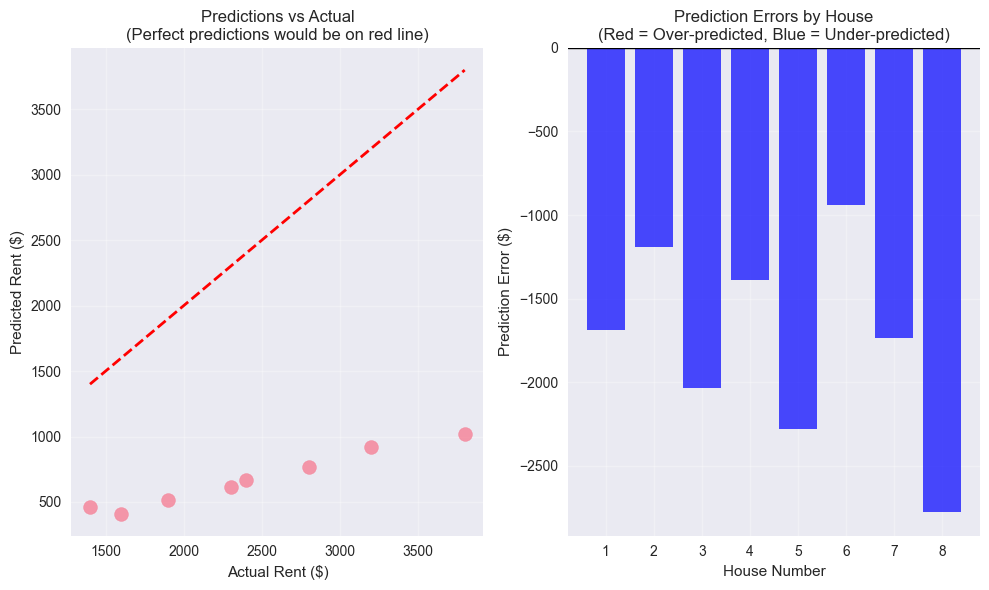

In [127]:
# ============================================================================
# PART 4: Loss Function - How Wrong Are We?
# ============================================================================

print("\n📊 PART 4: Loss Function - Measuring Our Mistakes")
print("-" * 30)

# Extract features and target from training data
X_train = training_data[:, :4]  # features (sqft, bedrooms, bathrooms, school)
y_train = training_data[:, 4]   # target (actual rent)

# Calculate current loss
current_loss, predictions, errors = model.calculate_loss(X_train, y_train)

print(f"Current model performance:")
print(f"Mean Squared Error (Loss): ${current_loss:.0f}")
print(f"Average prediction error: ${np.mean(np.abs(errors)):.0f}")

# Show detailed comparison
print(f"\nDetailed comparison:")
print(f"{'House':<6} {'Predicted':<10} {'Actual':<8} {'Error':<8} {'Error²':<10}")
print("-" * 50)
for i in range(len(predictions)):
    print(f"{i+1:<6} ${predictions[i]:<9.0f} ${y_train[i]:<7.0f} ${errors[i]:<7.0f} {errors[i]**2:<9.0f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions, alpha=0.7, s=100)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Rent ($)')
plt.ylabel('Predicted Rent ($)')
plt.title('Predictions vs Actual\n(Perfect predictions would be on red line)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
house_numbers = range(1, len(errors) + 1)
plt.bar(house_numbers, errors, alpha=0.7, 
        color=['red' if e > 0 else 'blue' for e in errors])
plt.xlabel('House Number')
plt.ylabel('Prediction Error ($)')
plt.title('Prediction Errors by House\n(Red = Over-predicted, Blue = Under-predicted)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()



In [128]:

# ============================================================================
# PART 5: Training the Model - Gradient Descent
# ============================================================================

print("\n⚡ PART 5: Training the Model - Gradient Descent")
print("-" * 30)

def train_one_step(learning_rate=0.0000001, verbose=True):
    """
    Train the model for one step using gradient descent
    This is where the AI learns!
    """
    # Calculate gradients (which direction to adjust parameters)
    gradients_w = [0, 0, 0, 0]  # gradients for weights
    gradient_bias = 0           # gradient for bias
    
    n_samples = len(X_train)
    
    # Calculate gradients for each training example
    for i in range(n_samples):
        sqft, bedrooms, bathrooms, school = X_train[i]
        actual_rent = y_train[i]
        
        # Make prediction
        predicted_rent = model.predict(sqft, bedrooms, bathrooms, school)
        # Print prediction details  
        print(f"\nHouse {i+1}: {sqft} sqft, {bedrooms} bed, {bathrooms} bath, school rating {school} and predicted rent {predicted_rent}" )
        
        # Calculate error
        error = predicted_rent - actual_rent
        print(f"House {i+1}: Predicted Rent = ${predicted_rent:.0f}, Actual Rent = ${actual_rent:.0f}, Error = ${error:.0f}")

        # Calculate gradients (partial derivatives)
        gradients_w[0] += error * sqft      # gradient w.r.t. w1
        gradients_w[1] += error * bedrooms  # gradient w.r.t. w2
        gradients_w[2] += error * bathrooms # gradient w.r.t. w3
        gradients_w[3] += error * school    # gradient w.r.t. w4
        gradient_bias += error              # gradient w.r.t. bias
    
    # Average the gradients
    gradients_w = [g / n_samples for g in gradients_w]
    # Average the bias gradient
    print(gradient_bias)
    gradient_bias = gradient_bias / n_samples
    
    # Print gradients for debugging
    print(f"\nGradients:{gradients_w}")
    print(f"Gradient Bias: {gradient_bias:.4f}")
    
    if verbose:
        print(f"Step {model.training_step + 1}:")
        print(f"  Gradients: w1={gradients_w[0]:.4f}, w2={gradients_w[1]:.4f}, w3={gradients_w[2]:.4f}, w4={gradients_w[3]:.4f}, bias={gradient_bias:.4f}")
    
    # Update parameters (move in opposite direction of gradient)
    model.w1 -= learning_rate * gradients_w[0]
    model.w2 -= learning_rate * gradients_w[1]
    model.w3 -= learning_rate * gradients_w[2]
    model.w4 -= learning_rate * gradients_w[3]
    model.bias -= learning_rate * gradient_bias
    
    # Calculate new loss
    new_loss, _, _ = model.calculate_loss(X_train, y_train)
    model.loss_history.append(new_loss)
    model.training_step += 1
    
    if verbose:
        print(f"  New loss: ${new_loss:.0f}")
        print(f"  New equation: Rent = {model.w1:.2f}×SqFt + {model.w2:.2f}×Bedrooms + {model.w3:.2f}×Bathrooms + {model.w4:.2f}×School + {model.bias:.2f}")
    
    return new_loss

# Train for one step to show the process
print("🔍 Training one step (learning rate = 0.0001):")
train_one_step(learning_rate=0.000001, verbose=True)



⚡ PART 5: Training the Model - Gradient Descent
------------------------------
🔍 Training one step (learning rate = 0.0001):

House 1: 1200 sqft, 3 bed, 2 bath, school rating 8 and predicted rent 615.3000000000001
House 1: Predicted Rent = $615, Actual Rent = $2300, Error = $-1685

House 2: 800 sqft, 2 bed, 1 bath, school rating 6 and predicted rent 411.3
House 2: Predicted Rent = $411, Actual Rent = $1600, Error = $-1189

House 3: 1500 sqft, 4 bed, 3 bath, school rating 9 and predicted rent 768.1
House 3: Predicted Rent = $768, Actual Rent = $2800, Error = $-2032

House 4: 1000 sqft, 2 bed, 2 bath, school rating 7 and predicted rent 513.1999999999999
House 4: Predicted Rent = $513, Actual Rent = $1900, Error = $-1387

House 5: 1800 sqft, 4 bed, 3 bath, school rating 9 and predicted rent 918.1
House 5: Predicted Rent = $918, Actual Rent = $3200, Error = $-2282

House 6: 900 sqft, 2 bed, 1 bath, school rating 5 and predicted rent 460.1
House 6: Predicted Rent = $460, Actual Rent = $140

np.float64(2651983.474719147)

In [131]:

# ============================================================================
# PART 6: Training Multiple Steps
# ============================================================================

print("\n🚀 PART 6: Training Multiple Steps")
print("-" * 30)

# Train for many steps
print("Training for 1000 steps...")
for step in range(25):
    train_one_step(learning_rate=0.0000001, verbose=False)

print(f"After 1000 training steps:")
model.show_equation()

# Calculate final loss
final_loss, final_predictions, final_errors = model.calculate_loss(X_train, y_train)
print(f"Final Loss: ${final_loss:.0f}")
print(f"Improvement: ${current_loss:.0f} → ${final_loss:.0f} (reduced by ${current_loss - final_loss:.0f})")



🚀 PART 6: Training Multiple Steps
------------------------------
Training for 1000 steps...

House 1: 1200 sqft, 3 bed, 2 bath, school rating 8 and predicted rent 2221.765883364308
House 1: Predicted Rent = $2222, Actual Rent = $2300, Error = $-78

House 2: 800 sqft, 2 bed, 1 bath, school rating 6 and predicted rent 1482.282008762599
House 2: Predicted Rent = $1482, Actual Rent = $1600, Error = $-118

House 3: 1500 sqft, 4 bed, 3 bath, school rating 9 and predicted rent 2776.1762752138684
House 3: Predicted Rent = $2776, Actual Rent = $2800, Error = $-24

House 4: 1000 sqft, 2 bed, 2 bath, school rating 7 and predicted rent 1851.9235528325892
House 4: Predicted Rent = $1852, Actual Rent = $1900, Error = $-48

House 5: 1800 sqft, 4 bed, 3 bath, school rating 9 and predicted rent 3327.772943221243
House 5: Predicted Rent = $3328, Actual Rent = $3200, Error = $128

House 6: 900 sqft, 2 bed, 1 bath, school rating 5 and predicted rent 1664.9396380153664
House 6: Predicted Rent = $1665, Act